In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import uniform
import seaborn as sns



In [3]:
BRAD_TRAIN = r"C:\Users\Brady\Documents\School\DS4400\train.csv"
BRAD_TEST = r"C:\Users\Brady\Documents\School\DS4400\test.csv"

In [4]:
train_df = pd.read_csv(BRAD_TRAIN)
test_df = pd.read_csv(BRAD_TEST)

print(train_df.head())

   Unnamed: 0           genres  a  aa  aalto  aaron  ab  abandon  abandoned  \
0           0            Drama  0   0      0      0   0        0          0   
1           1           Action  0   0      0      0   0        0          0   
2           2  Science Fiction  0   0      0      0   0        0          0   
3           3           Comedy  0   0      0      0   0        0          0   
4           4           Action  0   0      0      0   0        0          0   

   abandoning  ...  zoned  zoo  zoological  zoologist  zoom  zu  zucchini  \
0           0  ...      0    0           0          0     0   0         0   
1           0  ...      0    0           0          0     0   0         0   
2           0  ...      0    0           0          0     0   0         0   
3           0  ...      0    0           0          0     0   0         0   
4           0  ...      0    0           0          0     0   0         0   

   zulu  zurich  zwingli  
0     0       0        0  
1     0 

In [8]:
X_train = train_df.iloc[:, 2:]
y_train = train_df["genres"]

X_test = test_df.iloc[:, 2:]
y_test = test_df["genres"]

In [52]:
tagline_word_counts = X_train.sum(axis=0)

# Sort the columns based on their sums in descending order
sorted_columns = tagline_word_counts.sort_values(ascending=False)

# Calculate the number of columns to keep (top 50%)
num_columns_to_keep = int(len(sorted_columns) * 0.5)

# Select the top 50% columns
columns_to_keep = sorted_columns.head(num_columns_to_keep)

# Filter the dataframe to keep only the selected columns
X_train_filtered = X_train[columns_to_keep.index]
print(X_train_filtered)

label_encoder = LabelEncoder()

# Fit and transform the labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Display the encoded labels
print(y_train_encoded)
print(y_train)

title_names = X_train_filtered.columns.tolist()

# Filter DataFrame 2 to keep only the columns corresponding to title names from DataFrame 1
X_test_filtered = X_test[title_names]



      life  one  find  world  love  new  man  young  story  get  ...  \
0        0    0     0      0     0    0    0      0      0    0  ...   
1        0    0     0      0     0    0    0      0      0    0  ...   
2        0    0     1      0     1    1    0      0      0    0  ...   
3        0    0     0      0     0    0    0      0      0    0  ...   
4        0    0     0      0     0    0    0      0      0    0  ...   
...    ...  ...   ...    ...   ...  ...  ...    ...    ...  ...  ...   
9661     0    0     0      0     0    0    0      0      0    0  ...   
9662     0    0     0      0     1    0    0      0      0    0  ...   
9663     0    0     0      0     0    1    0      0      0    0  ...   
9664     1    0     0      1     1    0    1      2      1    1  ...   
9665     0    0     1      0     0    0    0      1      0    0  ...   

      distressed  anchorman  circular  browning  heartland  andersen  andes  \
0              0          0         0         0         

Accuracy: 0.3968352466645982


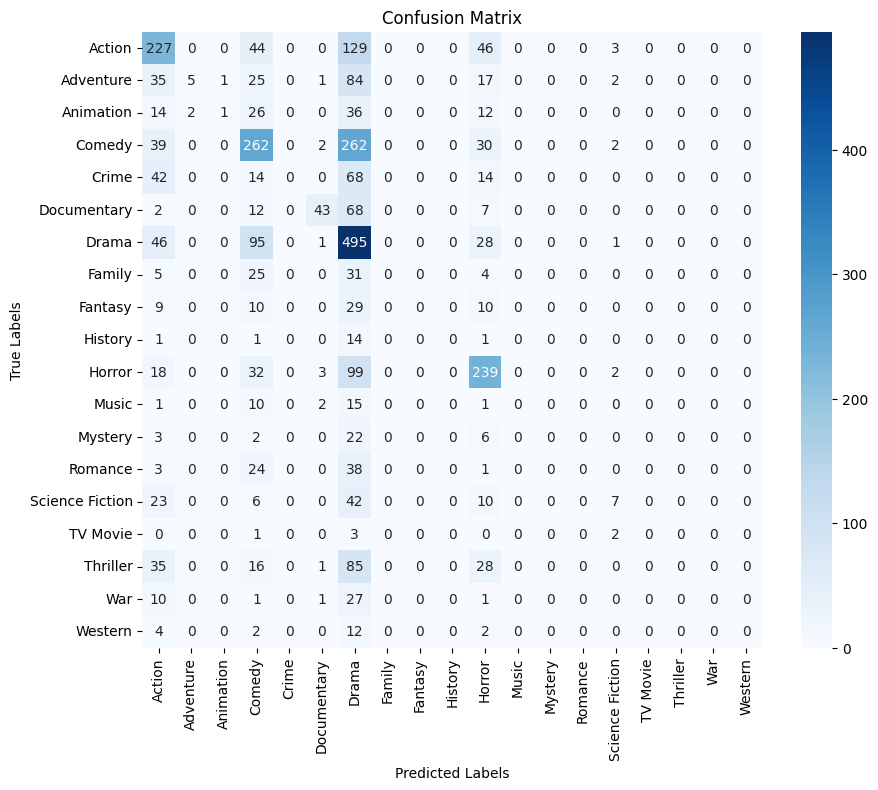

In [46]:

'''
dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'max_features': [0.01, 0.02]
}
'''

model_forest = RandomForestClassifier(n_estimators=300, random_state=42, max_depth=50)
model_forest.fit(X_train_filtered, y_train_encoded)
y_pred_encoded = model_forest.predict(X_test_filtered)

# Decode the predicted labels back to original genre labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


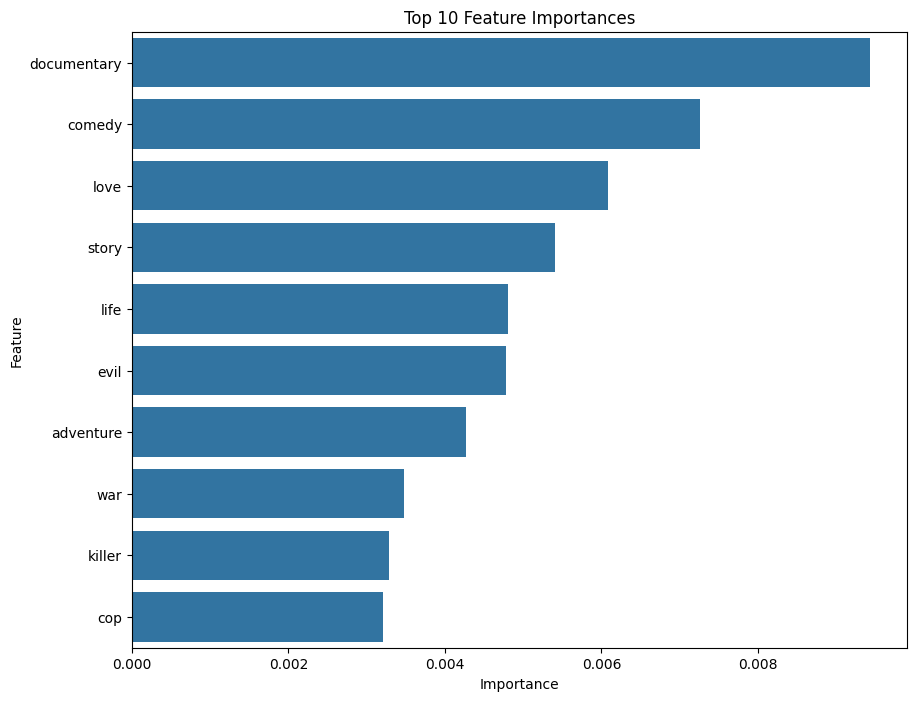

In [47]:
feature_importances = model_forest.feature_importances_

# Get the names of the features
feature_names = X_train_filtered.columns.tolist()  # Assuming df is your original dataframe

# Create a dataframe to hold feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the dataframe by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))  # Adjust head(10) to display top N features
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

# Random Forest

In [48]:

'''model_forest = RandomForestClassifier()



random_search = RandomizedSearchCV(estimator = model_forest, param_distributions=dist, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_'''

'model_forest = RandomForestClassifier()\n\n\n\nrandom_search = RandomizedSearchCV(estimator = model_forest, param_distributions=dist, n_iter=100, cv=5)\nrandom_search.fit(X_train, y_train)\n\nbest_params = random_search.best_params_'

# Adaboost

In [53]:
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost classifier
model_ada = AdaBoostClassifier(estimatpr=base_estimator, n_estimators=100, random_state=42)

# Fit the classifier on the training data
model_ada.fit(X_train_filtered, y_train_encoded)

# Predict the labels for the test data
y_pred_encoded = model_ada.predict(X_test_filtered)

y_pred = label_encoder.inverse_transform(y_pred_encoded)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

C:\Users\Brady\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.22959975178405212


# Logistic Regression

In [58]:
model_log = LogisticRegression(max_iter=1000)

# Fit the classifier on the training data
model_log.fit(X_train_filtered, y_train_encoded)

# Predict the labels for the test data
y_pred_encoded = model_log.predict(X_test_filtered)

y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.4030406453614645


# Naive Bayes

In [56]:
model_NB = MultinomialNB()

# Fit the classifier on the training data
model_NB.fit(X_train_filtered, y_train_encoded)

# Predict the labels for the test data
y_pred_encoded = model_NB.predict(X_test_filtered)

y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4564070741545144
